In [44]:
import pandas as pd
import pandas_datareader as pdr

data = pdr.get_data_fred('HOUSTNSA', '1960-01-01', '2020-12-01')

In [45]:
print(data.head())

            HOUSTNSA
DATE                
1960-01-01      86.0
1960-02-01      90.7
1960-03-01      90.5
1960-04-01     123.0
1960-05-01     130.2


In [46]:
housing = 100*data.HOUSTNSA.pct_change().dropna()

In [47]:
print(housing.head())

DATE
1960-02-01     5.465116
1960-03-01    -0.220507
1960-04-01    35.911602
1960-05-01     5.853659
1960-06-01    -5.683564
Name: HOUSTNSA, dtype: float64


<Axes: xlabel='DATE'>

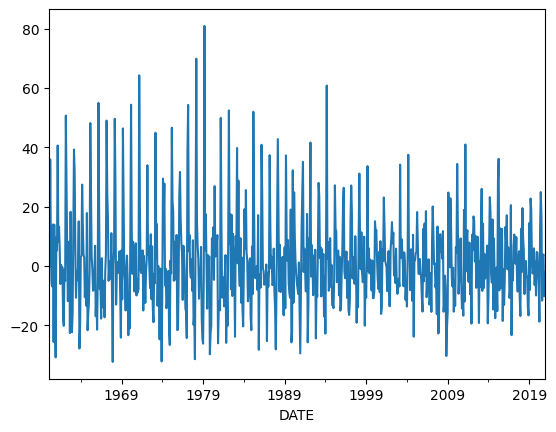

In [48]:
housing.plot()

In [53]:
df = housing.shift(3).to_frame('S3')
df['S2'] = housing.shift(2)
df['S1'] = housing.shift(1)
df.head(5)

,S3,S2,S1
DATE,,,
1960-02-01,NaN,NaN,NaN
1960-03-01,NaN,NaN,5.465116
1960-04-01,NaN,5.465116,-0.220507
1960-05-01,5.465116,-0.220507,35.911602
1960-06-01,-0.220507,35.911602,5.853659


In [54]:
#Fill values and make to numpy array
X = df.fillna(0).values
X[:5]

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  5.46511628],
       [ 0.        ,  5.46511628, -0.22050717],
       [ 5.46511628, -0.22050717, 35.91160221],
       [-0.22050717, 35.91160221,  5.85365854]])

In [55]:
Y = housing.values
Y[:5]

array([ 5.46511628, -0.22050717, 35.91160221,  5.85365854, -5.68356375])

Given the past 3 months of price changes, find the price change in the coming month

In [56]:
#Using simple Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [57]:
lr.fit(X, Y)

LinearRegression()

In [58]:
print(lr.coef_, lr.intercept_)

[-0.19324672  0.00038469  0.18901563] 1.2013349815993615


In [59]:
#Using AutoRegression

from statsmodels.tsa.ar_model import AutoReg
ar = AutoReg(housing, 3)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [60]:
results = ar.fit()
print(results.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  731
Model:                     AutoReg(3)   Log Likelihood               -3015.486
Method:               Conditional MLE   S.D. of innovations             15.229
Date:                Tue, 09 Jul 2024   AIC                           6040.971
Time:                        12:38:43   BIC                           6063.923
Sample:                    05-01-1960   HQIC                          6049.827
                         - 12-01-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1511      0.568      2.025      0.043       0.037       2.265
HOUSTNSA.L1     0.1896      0.036      5.231      0.000       0.119       0.261
HOUSTNSA.L2    -0.0006      0.037     -0.016    

In [41]:
X_test = X[100:200]
Y_test = Y[100:200]

lr_predictions = lr.predict(X_test)
ar_predictions = ar.predict(results.params, start=100, end=199)

In [43]:
from sklearn.metrics import mean_squared_error
lr_error = mean_squared_error(Y_test, lr_predictions)**0.5
ar_error = mean_squared_error(Y_test, ar_predictions)**0.5

print(f"Linear error: {lr_error}")
print(f"AutoReg error: {ar_error}")

Linear error: 16.362866756624047
AutoReg error: 16.36389987704959
